# Basic Data Visualisation with Python

Following our introduction to data manipulation, this notebook will show you how to create simple but effective visualisations of the restaurant data. We'll focus on practical plots that help us understand our customers and sales.

## Setting up the Environment

Let's import our libraries and load the data. We'll need pandas to handle the tabular data and seaborn for the data itself. We'll introduce matplotlib - a classic choice for visualisations in Python.

We can change the style of our visualisations using `plt.style.use()`. The supported styles can be found [at this link](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py). We'll use the style based on the well-known data science [website](https://projects.fivethirtyeight.com/).

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Load our dataset
df = sns.load_dataset('tips')

## 1. Pie Chart: Time Split

Pie charts are useful for showing proportions. Let's see how our dataset are split between lunch and dinner.

Some visualisations will need us to do some aggregation or analysis first. For this task, we need to know how many rows are **lunch** and how many rows are **dinner**. The `value_counts()` method will do this for us, giving us a table where the row indices are the time, and the values are the count.

In [2]:
# Calculate the count of meals by time
time_counts = df['time'].value_counts()
time_counts

,count
time,
Dinner,176
Lunch,68


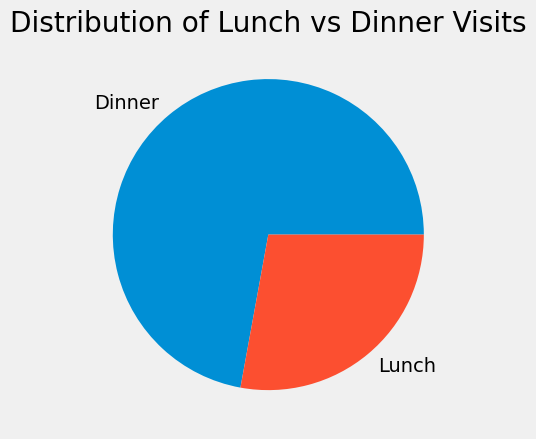

In [3]:
# Create a pie chart
plt.pie(time_counts.values, labels=time_counts.index)
plt.title('Distribution of Lunch vs Dinner Visits')
plt.show()

## 2. Scatter Plot: Bills vs Tips

A scatter plot can help us understand the relationship between variables - for example, bills and tips.

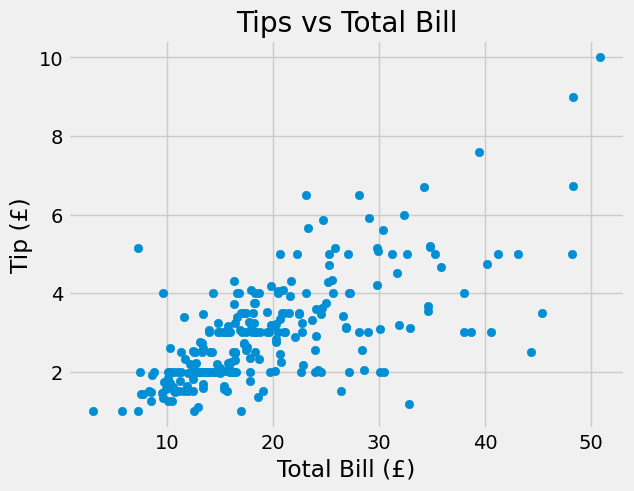

In [4]:
# Create a simple scatter plot
plt.scatter(df['total_bill'], df['tip'])
plt.title('Tips vs Total Bill')
plt.xlabel('Total Bill (£)')
plt.ylabel('Tip (£)')
plt.show()

## 3. Bar Charts: Understanding Daily Patterns

Bar charts are excellent for comparing values across different categories. Let's start by looking at our total daily sales, broken down by day.

As with our pie chart example, we need to do a little work first. We need a table where the row indices are the days of the week, and the values for each day is the total sales.

### Exercise 1

Determine the total sales per day.

In [5]:
# Create a simple bar chart of total sales by day
daily_totals = df.groupby('day', observed=True)['total_bill'].sum()
daily_totals

,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


### Plotting

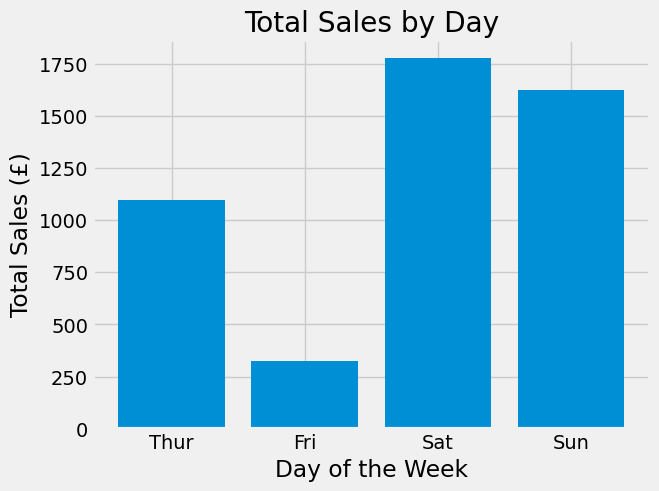

In [6]:
# Plot
plt.bar(daily_totals.index, daily_totals.values)
plt.title('Total Sales by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (£)')
plt.show()

## 4. Line plots

### Exercise 2

Line plots can help us see trends. Let's look at how tips vary across different days. Creating a line plot uses similar code to the bar plot - just be sure to use `plt.plot()` instead of `plt.bar()`.

Create a line plot showing the average tip on each day. Use the cell below to do so.

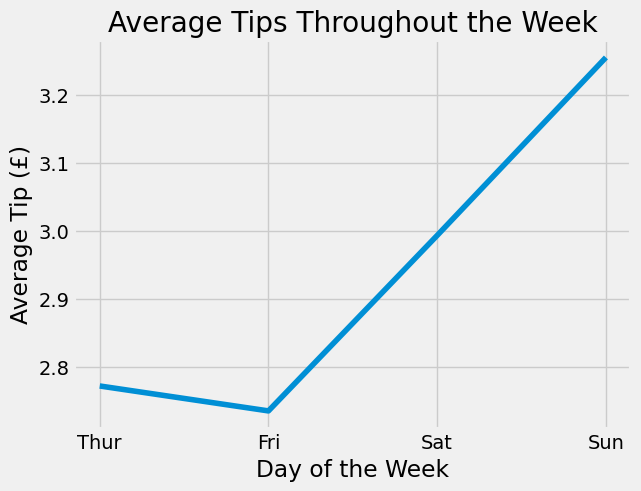

In [7]:
# Calculate average tips by day
daily_tips = df.groupby('day', observed=True)['tip'].mean()

# Create a line plot
plt.plot(daily_tips.index, daily_tips.values)
plt.title('Average Tips Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip (£)')
plt.show()

## 5. Seaborn

Up until now we've been using the seaborn library because it provides us with the Tips dataset. However - seaborn is first and foremost a plotting library!

Seaborn sits on top of matplotlib to provide more advanced statistical visualisations. For example, we can directly plot average sales by day, without having to groupby and aggregate ourselves.

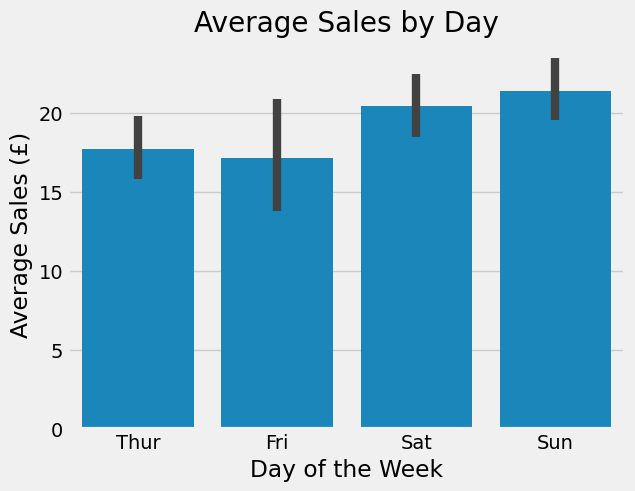

In [13]:
sns.barplot(data=df, x='day', y='total_bill')
plt.title('Average Sales by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales (£)')
plt.show()

### Exercise 3

Use seaborn to create a `boxplot` showing **tips** on each **day**.

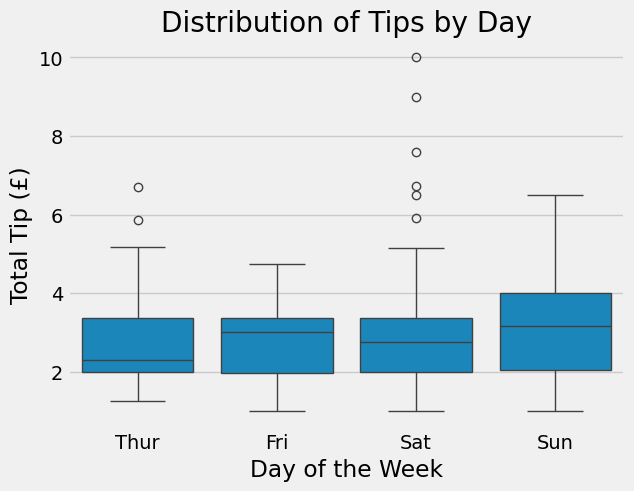

In [15]:
sns.boxplot(data=df, x='day', y='tip')
plt.title('Distribution of Tips by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Tip (£)')
plt.show()

## Conclusion

We've learned how to create four essential types of plots with `matplotlib`:
- Pie charts for showing proportions
- Scatter plots for showing relationships
- Bar charts for comparing categories
- Line plots for showing trends

And took the first steps with more advanced plotting with `seaborn`.